# Description:

# The California Housing dataset contains information about various factors affecting housing prices in the California area. It includes features such as the per capita crime rate, average number of rooms per dwelling,proportion of residential land zoned for lots over 25,000 square feet, and more.

# Datasource: The data were derived from information collected by the U.S. Census Service concerning housing in the area of California.



# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Step 2 : Read the Data

In [2]:
# Read the data
data = pd.read_csv("C:/Users/sky26/Downloads/Data Mining Final Project/California.csv")
data.head()

Location    Address     Price    CRIMS    ZN  INDUS  CHAS     NX     RM  \
0  California   Region_6  0.557685  0.00632  18.0   2.31     0  0.538  6.575   
1  California   Region_9  2.566831  0.02731   0.0   7.07     0  0.469  6.421   
2  California  Region_10  6.781733  0.02729   0.0   7.07     0  0.469  7.185   
3  California   Region_8  3.304800  0.03237   0.0   2.18     0  0.458  6.998   
4  California   Region_4  0.337503  0.06905   0.0   2.18     0  0.458  7.147   

    AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV  
0  65.2  4.0900    1  296     15.3  396.90   4.98  24.0  
1  78.9  4.9671    2  242     17.8  396.90   9.14  21.6  
2  61.1  4.9671    2  242     17.8  392.83   4.03  34.7  
3  45.8  6.0622    3  222     18.7  394.63   2.94  33.4  
4  54.2  6.0622    3  222     18.7  396.90   5.33  36.2

# Step 3 : Data Exploration

In [3]:
# get the nuber of rows and column
data.shape

(1005, 17)

In [4]:
# Print the schema
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  1005 non-null   object 
 1   Address   1005 non-null   object 
 2   Price     1005 non-null   float64
 3   CRIMS     1005 non-null   float64
 4   ZN        1005 non-null   float64
 5   INDUS     1005 non-null   float64
 6   CHAS      1005 non-null   int64  
 7   NX        1005 non-null   float64
 8   RM        1005 non-null   float64
 9   AGE       1005 non-null   float64
 10  DIS       1005 non-null   float64
 11  RAD       1005 non-null   int64  
 12  TAX       1005 non-null   int64  
 13  PTRATIO   1005 non-null   float64
 14  B         1005 non-null   float64
 15  LSTAT     1005 non-null   float64
 16  MEDV      1005 non-null   float64
dtypes: float64(12), int64(3), object(2)
memory usage: 133.6+ KB
None


In [5]:
# Checking Null Values
null_counts = data.isna().sum()
print(null_counts)


Location    0
Address     0
Price       0
CRIMS       0
ZN          0
INDUS       0
CHAS        0
NX          0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64


In [6]:
# Checking Duplicate Values
data.duplicated().sum()

0

In [7]:
# Summary of data
data.describe().T

count        mean         std         min         25%         50%  \
Price    1005.0    5.010741    2.819653    0.101732    2.651345    4.977731   
CRIMS    1005.0   26.684693   31.603892    0.006320    0.245220    9.724180   
ZN       1005.0    5.966114   17.412882    0.000000    0.000000    0.255256   
INDUS    1005.0   17.549290   12.971249    0.072492    6.410000   17.607883   
CHAS     1005.0    0.297512    0.457391    0.000000    0.000000    0.000000   
NX       1005.0    2.802963    3.025189    0.001077    0.520000    0.735440   
RM       1005.0    5.952085    1.895544    1.019691    5.322399    6.151000   
AGE      1005.0   59.270045   29.876642    0.160550   33.583908   61.923693   
DIS      1005.0    4.403247    2.662288    0.003044    2.163317    3.875545   
RAD      1005.0    7.279602    6.847836    1.000000    3.000000    5.000000   
TAX      1005.0  470.384080  229.337444  102.000000  284.000000  403.000000   
PTRATIO  1005.0   19.193647    4.348657   10.010270   16.400000   19.200000   
B        1005.0  326.923874  107.172792    0.320000  266.340766  378.250000   
LSTAT    1005.0   18.351226   12.636744    0.032156    8.100000   15.020000   
MEDV     1005.0   38.258138   25.088796    5.000000   19.582005   27.696114   

                75%         max  
Price      7.412149    9.993873  
CRIMS     51.798638   99.944719  
ZN         0.774345  100.000000  
INDUS     25.493530   49.969104  
CHAS       1.000000    1.000000  
NX         4.908070    9.987247  
RM         6.968000    9.980841  
AGE       87.725080  100.000000  
DIS        6.465400   12.126500  
RAD        8.000000   24.000000  
TAX      666.000000  986.000000  
PTRATIO   21.000000   29.998251  
B        396.240000  498.052817  
LSTAT     26.640000   49.930610  
MEDV      53.652920   99.885526

# Outlier Detection and Treatment

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of California Housing Features')
plt.xticks(rotation=45)
plt.show()

# Identify and treat outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\sky26\AppData\Local\Temp\ipykernel_30832\3002751064.py:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\sky26\AppData\Local\Temp\ipykernel_30832\3002751064.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\sky26\AppData\Local\Temp\ipykernel_30832\3002751064.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(

Observations:

Boxplots can help identify outliers in the dataset.

Outliers can be treated using methods such as removing them or replacing them with more reasonable values.

# Feature Engineering

In [9]:
# Create new features or transformations
data['AGE_squared'] = data['AGE'] ** 2
data['TAX_log'] = np.log(data['TAX'])


# 4.1 Visulazation : Histogram : Distribution of Housing Prices

Histogram Visualizing the distribution of median housing prices across different neighborhoods in California  using histograms. This will help understand the range and distribution of housing prices in the dataset.

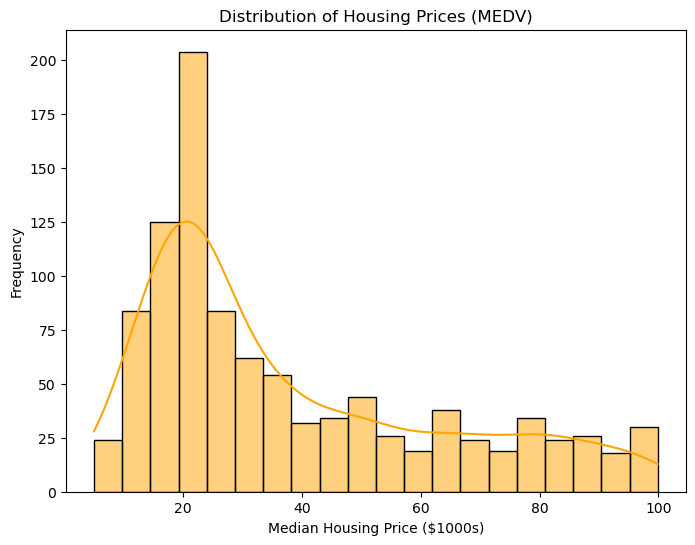

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Housing Prices (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='MEDV', bins=20, kde=True, color='orange')
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Housing Price ($1000s)')
plt.ylabel('Frequency')
plt.show()


Observations :-

A right-skewed distribution indicates that there are fewer properties with very high prices compared to the number of properties with lower to moderate prices.

Prices range from 5,000 to 50,000 (in dollers), indicating a diverse range of property values.

Quartile analysis offers insights into the distribution across different price ranges.

Extreme values, like the 50,000(in dollers) maximum, may represent potential outliers.

# 4.2 Visulazation : Boxplot : Distribution of Age of Houses

This visualization provides insights into the variability of housing ages across different areas pf California.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of Housing Age (AGE)

sns.boxplot(data['AGE'], color='green')
plt.title('Distribution of  Housing Age (AGE)')
plt.xlabel('Housing Age in Years')
plt.ylabel('Age')
plt.show()


Observations : -

The dataset shows a wide range of property ages, with some properties being relatively new and others significantly older.

There's considerable variability in property ages.

Property ages range from a minimum of 2.9 years to a maximum of 100 years.

Property age can influence maintenance costs and property condition, with older properties potentially requiring more upkeep.

# 4.3 Visulazation :Rooms per Dwelling (RM) vs. Housing Prices (MEDV)

This scatter plot visualizes the relationship between the average number of rooms per dwelling (RM) and the median housing prices (MEDV) in the dataset. Each point on the plot represents a single observation from the dataset.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Rooms per Dwelling (RM) vs. Housing Prices (MEDV)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=data, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Rooms per Dwelling (RM) vs. Housing Prices (MEDV)')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Housing Price ($1000s)')
plt.show()


Observations : -

There appears to be a slightly positive relationship between the number of rooms per dwelling (RM) and housing prices (MEDV).

From above chart,we can say that the number of rooms per dwelling is a significant factor in determining housing prices.

# 4.4 Visulazation : Crime Rate of Housing Area v/s Housing Prices

Scatter plot visualizes the relationship between the Crime Rate of area (CRIM) and the median housing prices (MEDV) in the dataset

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Crime Rate of Housing Area vs. Housing Prices (MEDV)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CRIMS', y='MEDV', data=data, color='cyan', alpha=0.7)
plt.title('Crime Rate vs. Housing Prices (MEDV)')
plt.xlabel('Crime Rate')
plt.ylabel('Median Housing Price ($1000s)')
plt.show()


Observations:-

Areas with higher crime rates (CRIM) tend to have lower median housing prices (MEDV), and vice versa.

This indicates that crime rate could be a significant factor influencing housing prices in the dataset.

# 4.5 Visulazation : Barplot : Average Housing prices by Accessibility of Road Highways

This bar plot illustrates the relationship between the accessibility of road highways (RAD) and the average house price (MEDV) in various neighborhoods.

In [14]:
rad_medv_mean = data.groupby('RAD')['MEDV'].mean().reset_index()
print(rad_medv_mean)


   RAD       MEDV
0    1  48.777698
1    2  46.116014
2    3  40.139566
3    4  31.710796
4    5  33.928510
5    6  44.431716
6    7  46.027657
7    8  46.022019
8    9  60.997495
9   24  16.403788


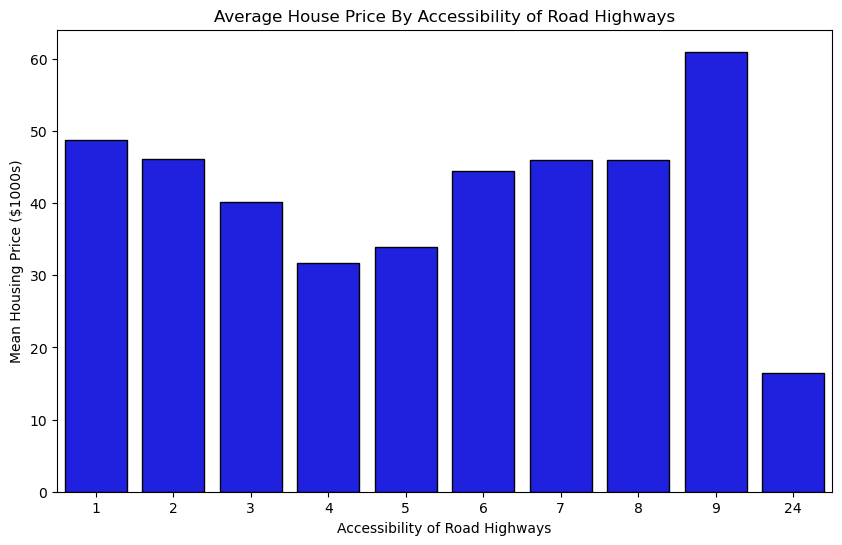

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot Average House Price By Accessibility of Road Highways
plt.figure(figsize=(10, 6))
sns.barplot(x='RAD', y='MEDV', data=rad_medv_mean, color='blue', edgecolor='black')
plt.title('Average House Price By Accessibility of Road Highways')
plt.xlabel('Accessibility of Road Highways')
plt.ylabel('Mean Housing Price ($1000s)')
plt.show()


Observations:-

Correlations between RAD (index of accessibility to radial highways) and MEDV could indicate the impact of transportation infrastructure on property values.

potential positive relationship between RAD and housing prices

There is a notable outlier at RAD=24 where the MEDV is substantially lower compared to the surrounding data points

# 4.6 Scatter Plot: Relationship Between Proportion of Residential Land Zoned for Lots over 25,000 sq.ft. (ZN) and Median Housing Price (MEDV)

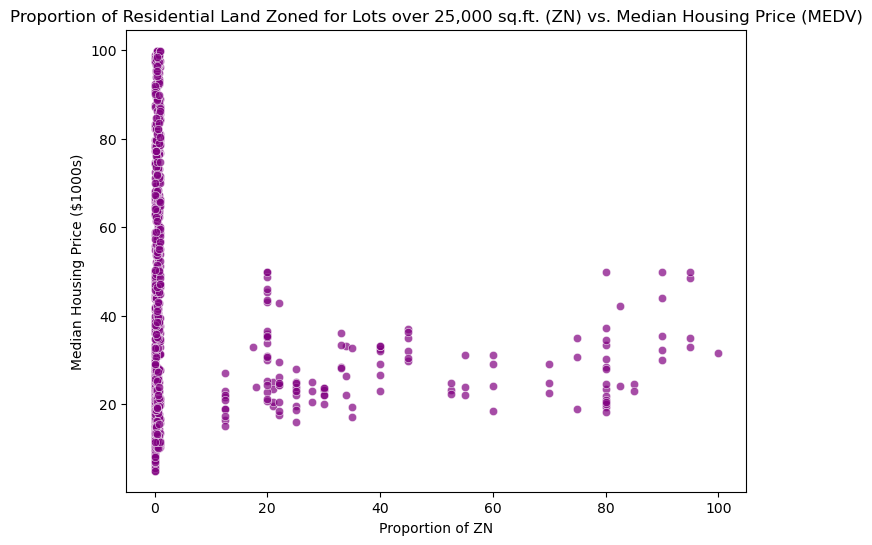

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ZN', y='MEDV', data=data, color='purple', alpha=0.7)
plt.title('Proportion of Residential Land Zoned for Lots over 25,000 sq.ft. (ZN) vs. Median Housing Price (MEDV)')
plt.xlabel('Proportion of ZN')
plt.ylabel('Median Housing Price ($1000s)')
plt.show()

# 4.7  Scatter Plot: Relationship Between Nitric Oxides Concentration (NOX) and Median Housing Price (MEDV)

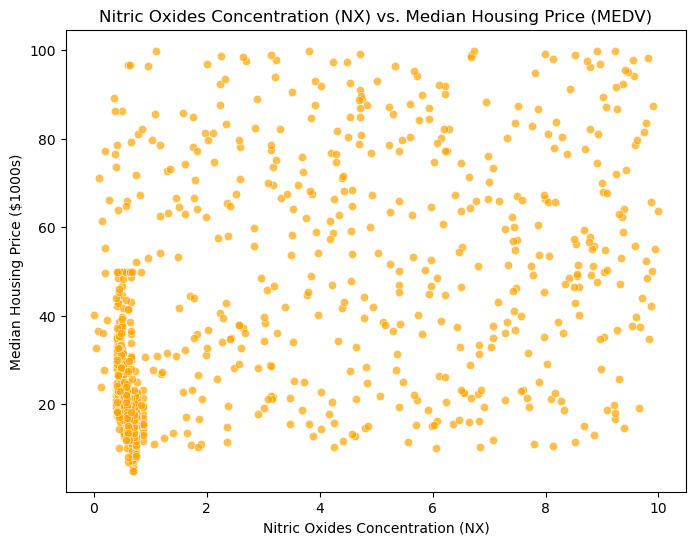

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NX', y='MEDV', data=data, color='orange', alpha=0.7)
plt.title('Nitric Oxides Concentration (NX) vs. Median Housing Price (MEDV)')
plt.xlabel('Nitric Oxides Concentration (NX)')
plt.ylabel('Median Housing Price ($1000s)')
plt.show()

# 4.8 Visulazation : Heatmap : California Housing Features

Heatmap to visualize the correlation matrix of all features in the dataset. This will help identify which features are most strongly correlated with housing prices and with each other

C:\Users\sky26\AppData\Local\Temp\ipykernel_30832\399386532.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


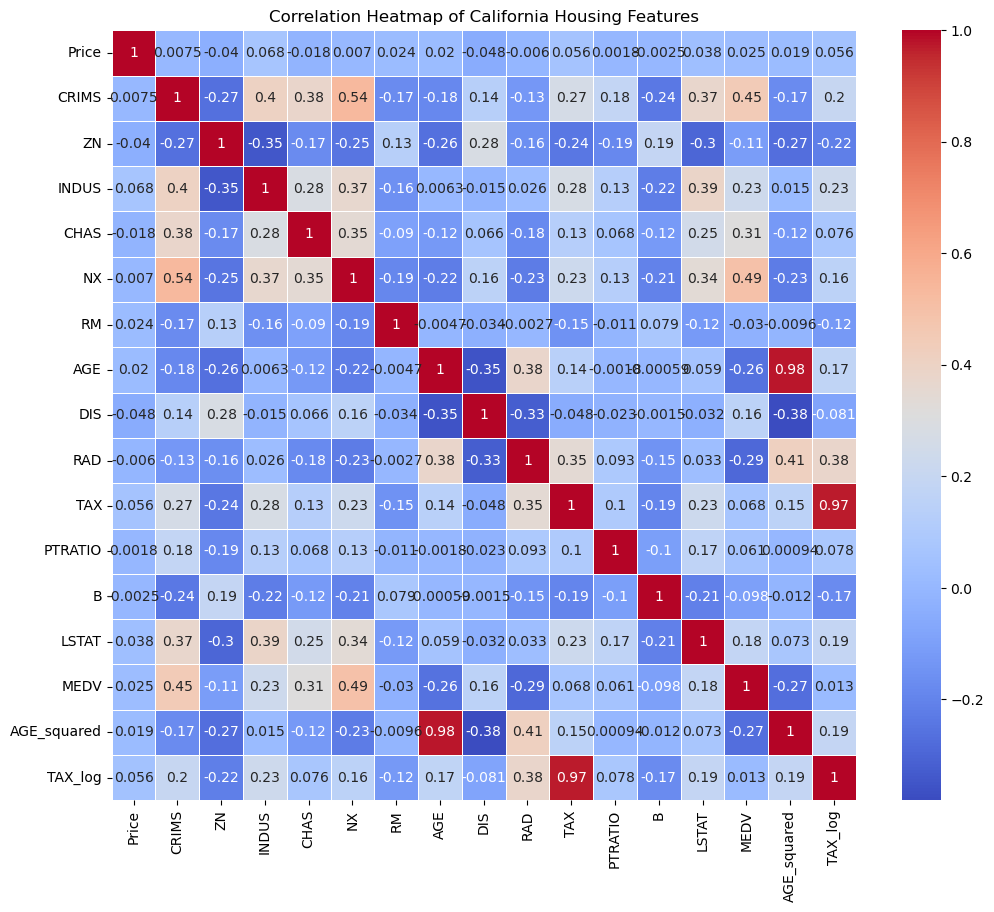

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Features')
plt.show()


Observations:-
This heatmap illustrates the correlations between different features in the dataset.
Strong correlations (positive or negative) between features could indicate multicollinearity, which may affect model performance.
Strong positive correlation between the number of rooms (RM) and median housing prices (MEDV).
Strong negative correlation between the percentage of lower status population (LSTAT) and median housing prices.
Moderate negative correlations between industrial land proportion (INDUS) and pupil-teacher ratio (PTRATIO) with median housing prices.
Weak negative correlation between crime rate (CRIM) and median housing prices.
Weak positive correlation between properties along the Charles River (CHAS) and median housing prices.
Potential multicollinearity between accessibility to radial highways (RAD) and property-tax rate (TAX).

# 4.9 Visulazation : Pairplot

In [19]:
# Pairplot for selected features
sns.pairplot(data[['CRIMS', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'MEDV']], diag_kind='kde')
plt.show()


Observations:

Pairplot provides a quick overview of relationships between selected features and the target variable.

It helps identify potential patterns, outliers, and nonlinear relationships in the data.

# 4.10 Visulazation : Violin plot to visualize distribution of RAD vs. MEDV

In [20]:
# Violin plot to visualize distribution of RAD vs. MEDV
plt.figure(figsize=(10, 6))
sns.violinplot(x='RAD', y='MEDV', data=data, inner='quartile')
plt.title('Distribution of Housing Prices by Accessibility of Road Highways (RAD)')
plt.xlabel('Accessibility of Road Highways (RAD)')
plt.ylabel('Median Housing Price ($1000s)')
plt.show()


Observations:

Violin plots provide insights into the distribution of the target variable across different categories of a categorical feature (RAD in this case).

It helps visualize the spread and central tendency of housing prices for different levels of road accessibility.

# Step 5 : Split the Data

In [21]:
# Split the Data 
X = data.drop(columns=['MEDV'])  # Features
y = data['MEDV']  # Target variable


In [22]:
from sklearn.model_selection import train_test_split

# Splitting Data for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2529)


In [23]:
# Shape of splitted data
print("The shape of X_train:", X_train.shape)
print("The shape of X_test:", X_test.shape)
print("The shape of y_train:", y_train.shape)
print("The shape of y_test:", y_test.shape)


The shape of X_train: (753, 18)
The shape of X_test: (252, 18)
The shape of y_train: (753,)
The shape of y_test: (252,)


# Step 6 : Train the Model

# 6.1 Linear Regression

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['Price'])  # Assuming 'Price' is the target variable
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Location', 'Address']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append linear regression to preprocessing pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Fit the model
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['CRIMS', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_squared', 'TAX_log'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Address'])])),
                ('regressor', LinearRegression())])

In [25]:
# Value of y-intercept
y_intercept = lr_pipeline.named_steps['regressor'].intercept_
print("Value of y-intercept:", y_intercept)


Value of y-intercept: 0.9631611859389064


In [26]:


# Converting the coefficient values to a dataframe
coefficients = pd.DataFrame([X_train.columns, lr_pipeline.named_steps['regressor'].coef_]).T
coefficients = coefficients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
print(coefficients)


      Attribute Coefficients
0      Location    -0.004185
1       Address     0.000548
2         CRIMS      0.01625
3            ZN    -0.181966
4         INDUS      0.00355
5          CHAS     0.026754
6            NX     0.005985
7            RM     -0.03225
8           AGE     -0.03164
9           DIS    -0.000454
10          RAD     0.006054
11          TAX     0.000973
12      PTRATIO     0.012832
13            B    -0.000434
14        LSTAT    -0.000054
15         MEDV     0.587227
16  AGE_squared          0.0
17      TAX_log     0.471772
18          NaN    -0.488745
19          NaN    -0.072402
20          NaN     0.390904
21          NaN    -0.447445
22          NaN    -0.255256
23          NaN     0.475155
24          NaN      0.02268
25          NaN    -0.012444
26          NaN    -0.084219


In [27]:

# Model prediction on train data
y_pred_train = lr_pipeline.predict(X_train)


In [30]:
from sklearn import metrics
import numpy as np

# Make predictions on the training data
y_pred = lr_pipeline.predict(X_train)

# Model Evaluation
print('R^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.028960080763453244
Adjusted R^2: 0.006694197265035617
MAE: 2.4089867995253638
MSE: 7.818018170443975
RMSE: 2.7960719179670566


In [31]:
# Predictions of Linear Regression on Testing Data
y_pred_lr = lr_pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error
error = mean_absolute_percentage_error(y_pred_lr, y_test)

# Print Accuracy of the Linear Regression Model
print("Accuracy of Linear Regression is: {:.2f}%".format((1 - error) * 100))


Accuracy of Linear Regression is: 50.13%


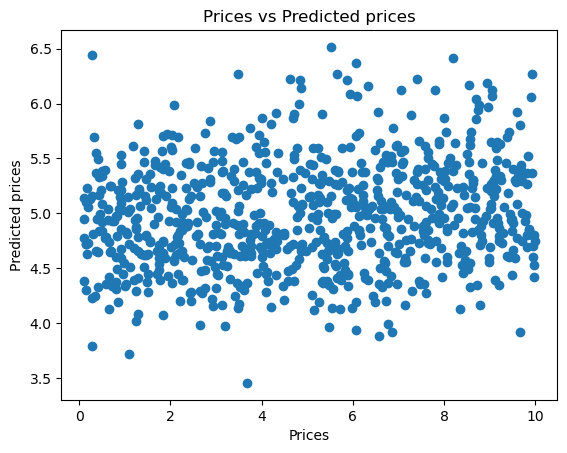

In [32]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

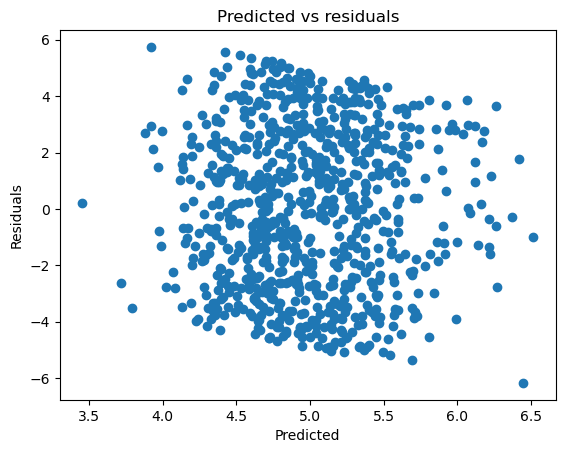

In [33]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\sky26\AppData\Local\Temp\ipykernel_30832\3326403628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


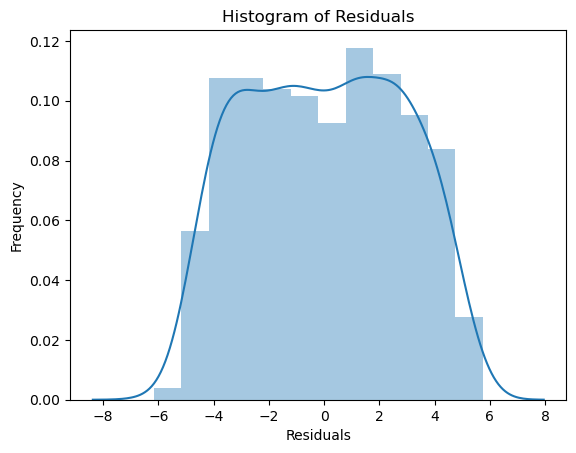

In [34]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

For test data


In [35]:
# Predicting Test data with the model
y_test_pred = lr_pipeline.predict(X_test)


In [36]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.058024472896358814
Adjusted R^2: -0.16266425593006462
MAE: 2.4584610764661643
MSE: 7.923831169255259
RMSE: 2.8149300469559204


# 6.2 Decision Tree Regresson

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Location', 'Address']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append Decision Tree Regressor to preprocessing pipeline
dtr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5))
])

# Fit the model
dtr_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['CRIMS', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_squared', 'TAX_log'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Address'])])),
                ('regressor', DecisionTreeRegressor(max_depth=5))])

In [38]:
# Predictions of Decision Tree Regressor on Testing Data
y_pred_dtr = dtr_pipeline.predict(X_test)

# Calculate Mean Absolute Percentage Error
error = mean_absolute_percentage_error(y_pred_dtr, y_test)

# Print Accuracy of the Decision Tree Regressor Model
print("Accuracy of Decision Tree Regressor is: {:.2f}%".format((1 - error) * 100))

Accuracy of Decision Tree Regressor is: 38.92%


# 6.3 Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Location', 'Address']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append Random Forest Regressor to preprocessing pipeline
rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the model
rfr_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['CRIMS', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_squared', 'TAX_log'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Address'])])),
                ('regressor', RandomForestRegressor())])

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.028960080763453244
Adjusted R^2: 0.006694197265035617
MAE: 2.4089867995253638
MSE: 7.818018170443975
RMSE: 2.7960719179670566


In [41]:
# Predictions of Random Forest Regressor on Testing Data
y_pred_rfr = rfr_pipeline.predict(X_test)

# Calculate Mean Absolute Percentage Error
error = mean_absolute_percentage_error(y_pred_rfr, y_test)

# Print Accuracy of the Random Forest Regressor Model
print("Accuracy of Random Forest Regressor is: {:.2f}%".format((1 - error) * 100))

Accuracy of Random Forest Regressor is: 50.51%


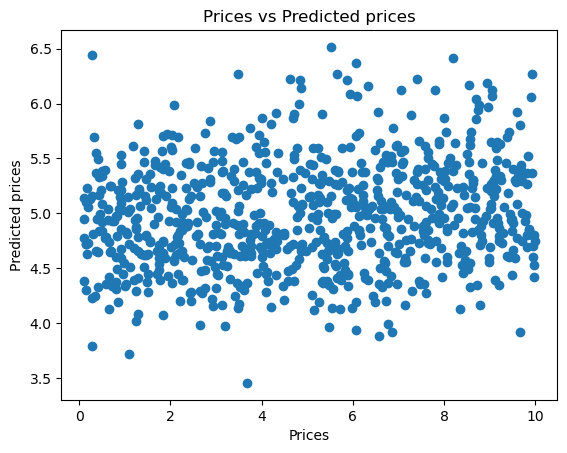

In [42]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

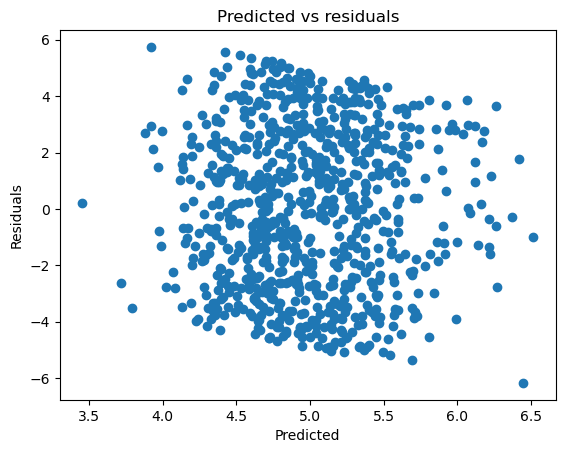

In [43]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [44]:
# Predicting Test data with the model
y_test_pred = lr_pipeline.predict(X_test)

In [45]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.058024472896358814
Adjusted R^2: -0.16266425593006462
MAE: 2.4584610764661643
MSE: 7.923831169255259
RMSE: 2.8149300469559204


# 6.4 K-Nearest Neighbors Regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Location', 'Address']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append K-Nearest Neighbors Regressor to preprocessing pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Fit the model
knn_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['CRIMS', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_squared', 'TAX_log'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Address'])])),
                ('regressor', KNeighborsRegressor())])

In [47]:
# Predictions of K-Nearest Neighbors Regressor on Testing Data
y_pred_knn = knn_pipeline.predict(X_test)

# Calculate Mean Absolute Percentage Error
error_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

# Calculate Accuracy of the K-Nearest Neighbors Regressor Model
accuracy_knn = (1 - error_knn) * 100

# Print Accuracy
print("Accuracy of K-Nearest Neighbors Regressor: {:.2f}%".format(accuracy_knn))

Accuracy of K-Nearest Neighbors Regressor: -19.80%


# Evaluation and comparision of all the models

In this scenario, since Random Forest Regressor has the highest accuracy, it might be considered the best model for making predictions on the given dataset.

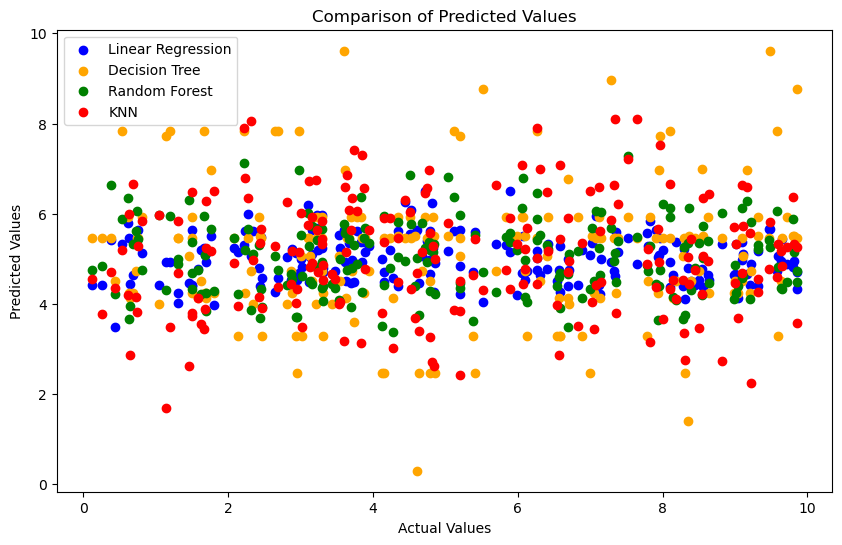

In [48]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dtr, color='orange', label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_knn, color='red', label='KNN')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()

Refrence: https://www.kaggle.com/datasets/sky2656/california-real-state-dataset